In [1]:
# Run this and then restart the kernel at the start of each session to install
# 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import altair as alt
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import seaborn as sn
import statsmodels.formula.api as smf
import teotil3 as teo
from tqdm.notebook import tqdm

plt.style.use("ggplot")

# Task 2.15: Testing, documentation and reporting

## Part B: Compare to measured fluxes

## 1. Generate input files

The code below generates model input files from the "raw" data in the TEOTIL3 database.

In [3]:
eng = nivapy.da.connect_postgis()

Connection successful.


In [4]:
nve_data_year = 2023
st_yr, end_yr = 2013, 2022
out_csv_fold = r"/home/jovyan/shared/common/teotil3/annual_input_data"
eval_fold = r"/home/jovyan/shared/common/teotil3/evaluation"

In [5]:
# %%time

# # Generate model input files and save to disk
# years = range(st_yr, end_yr + 1)
# for year in tqdm(years):
#     gdf = teo.io.make_input_file(
#         year,
#         nve_data_year,
#         eng,
#         out_csv_fold=out_csv_fold,
#         nan_to_vass=True,
#         add_offshore=True,
#         order_coastal=False,  # Recommend False, excpet for comparison with TEOTIL2
#         land_to_vass=True,  # Recommend True, excpet for comparison with TEOTIL2
#     )

## 2. Run model

The code below runs the model for the period of interest. Results are merged and saved to a single CSV, so this code does not need re-running unless the model or its inputs are updated.

In [6]:
# ############################################################################
# # Set totals_from_subfracs=True below once all fractions are in the database
# ############################################################################

# # Run TEOTIL3
# years = range(st_yr, end_yr + 1)
# df_list = []
# for year in tqdm(years):
#     csv_path = os.path.join(
#         out_csv_fold,
#         f"teotil3_input_data_nve{nve_data_year}_{year}.csv",
#     )
#     g = teo.model.run_model(
#         csv_path,
#         id_col="regine",
#         next_down_col="regine_down",
#         totals_from_subfracs=True,
#     )
#     res_df = teo.model.model_to_dataframe(
#         g, id_col="regine", next_down_col="regine_down"
#     )
#     res_df["year"] = year
#     df_list.append(res_df)
# mod_df = pd.concat(df_list, axis="rows")

# mod_csv = os.path.join(
#     eval_fold, f"teo3_results_nve{nve_data_year}_{st_yr}-{end_yr}.csv"
# )
# mod_df.to_csv(mod_csv, index=False)

In [7]:
# Read saved data for speed
mod_csv = os.path.join(
    eval_fold, f"teo3_results_nve{nve_data_year}_{st_yr}-{end_yr}.csv"
)
mod_df = pd.read_csv(mod_csv)
mod_df.head()

,regine,regine_down,accum_aquaculture_din_kg,accum_aquaculture_tdp_kg,accum_aquaculture_toc_kg,accum_aquaculture_ton_kg,accum_aquaculture_totn_kg,accum_aquaculture_totp_kg,accum_aquaculture_tpp_kg,accum_glacier_ss_kg,...,local_urban_tpp_kg,local_wood_din_kg,local_wood_ss_kg,local_wood_tdp_kg,local_wood_toc_kg,local_wood_ton_kg,local_wood_totn_kg,local_wood_totp_kg,local_wood_tpp_kg,year
0,001.10,001.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,31.1,849.2,0.6,8131.6,198.1,229.2,3.8,3.2,2013
1,001.1A2B,001.1A2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.4,1118.4,29798.4,22.2,305633.2,7434.2,8552.6,145.1,122.9,2013
2,001.1A4D,001.1A4C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,201.7,5272.5,4.0,55828.0,1357.5,1559.2,26.5,22.5,2013
3,001.1M,001.1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,400.8,11104.0,8.1,113980.3,2751.8,3152.6,53.8,45.7,2013
4,001.21,001.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.2,117.0,0.1,1110.1,27.1,31.3,0.5,0.4,2013


## 3. Compare to measured data

### 3.1. Discharge

#### 3.1.1. Data for all NVE stations

Get all NVE discharge available in HydAPI.

In [8]:
# Define stations, parameters and time period of interest
par_ids = [1001]  # Discharge
st_dt = f"{st_yr}-01-01"
end_dt = f"{end_yr}-12-31"

In [9]:
# List all stations
stn_df = nivapy.da.get_nve_hydapi_stations()
print(len(stn_df), "stations available.")
stn_df.head()

1778 stations available.


,station_id,station_name,latitude,longitude,utmEast_Z33,utmNorth_Z33,masl,riverName,councilNumber,councilName,...,culQ5,culQ10,culQ20,culQ50,culHm,culH5,culH10,culH20,culH50,seriesList
0,1.15.0,Femsjø,59.13015,11.48516,298887,6559841,81,Haldenvassdraget,3001,Halden,...,NaN,NaN,NaN,NaN,79.5445,79.6849,79.8397,80.0075,80.2569,"[{'parameterName': 'Vannstand', 'parameter': 1..."
1,1.200.0,Lierelv,59.92038,11.53180,306146,6647624,134,Haldenvassdraget,3026,Aurskog-Høland,...,32.6537,34.9251,36.4982,37.9152,2.2229,2.3076,2.3381,2.3585,2.3764,"[{'parameterName': 'Vannstand', 'parameter': 1..."
2,1.41.0,Lognselva,59.80011,11.44331,300484,6634505,148,Haldenvassdraget,3026,Aurskog-Høland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'parameterName': 'Vannstand', 'parameter': 1..."
3,1.42.0,Øymarksjø,59.33290,11.63712,308715,6581952,109,Haldenvassdraget,3012,Aremark,...,NaN,NaN,NaN,NaN,108.7308,108.9470,109.1370,109.3253,109.5781,"[{'parameterName': 'Vannstand', 'parameter': 1..."
4,1.43.0,Aspern og Ara,59.14667,11.69273,310848,6561073,106,Haldenvassdraget,3012,Aremark,...,NaN,NaN,NaN,NaN,106.0564,106.1387,106.2884,106.4785,106.8168,"[{'parameterName': 'Vannstand', 'parameter': 1..."


In [10]:
# # Get all discharge data for period from interest from HydAPI
# df_list = []
# stn_ids = []
# for stn_id in tqdm(list(stn_df["station_id"])):
#     try:
#         df = nivapy.da.query_nve_hydapi(
#             [stn_id], par_ids, st_dt, end_dt, resolution=1440
#         )
#         df_list.append(df)
#         stn_ids.append(stn_id)
#     except:
#         pass
# obs_q_df = pd.concat(df_list, axis="rows")
# stn_df = stn_df.query("station_id in @stn_ids")

# # Calculate annual mean flows
# obs_q_df["year"] = obs_q_df["datetime"].dt.year
# obs_q_df = obs_q_df[["station_id", "year", "value"]]
# obs_q_df = obs_q_df.groupby(["station_id", "year"]).agg(["mean", "count"])
# obs_q_df.columns = obs_q_df.columns.get_level_values(1)
# obs_q_df.reset_index(inplace=True)
# obs_q_df = obs_q_df.query("count > 360")
# del obs_q_df["count"]
# obs_q_df.rename({"mean": "obs_q_m3ps"}, axis="columns", inplace=True)

# # Join station details
# obs_q_df = pd.merge(
#     obs_q_df,
#     stn_df[
#         [
#             "station_id",
#             "station_name",
#             "latitude",
#             "longitude",
#             "drainageBasinArea",
#             "regineNo",
#             "specificDischarge",
#         ]
#     ],
#     how="left",
#     on="station_id",
# )
# nve_csv = os.path.join(eval_fold, f"nve_hydapi_discharge_{st_yr}-{end_yr}.csv")
# obs_q_df.to_csv(nve_csv, index=False)

In [11]:
# Read saved data for speed
nve_csv = os.path.join(eval_fold, f"nve_hydapi_discharge_{st_yr}-{end_yr}.csv")
obs_q_df = pd.read_csv(nve_csv)
obs_q_df.rename({"regineNo": "regine"}, axis="columns", inplace=True)

# Remove stations that are not approptiate to compare
#  74.109.0 - NVE values are really extreme (>1E6 m3/s, which is bigger than the Amazon)
#  2.1119.0 - Regine is part of Glomma main stem, but station is on a small tributary
#  16.154.0 - Regine is part of Skienselva main stem, but station is on a small tributary
#  2.1225.0 - Regine is part of Vorma/Lågen main stem, but station is on a small tributary
#  156.49.0 - Major dam (i.e. regulated)
#  Sites named 'Total Q...' are heavily regulated
excl_list = ["2.1119.0", "16.154.0", "2.1225.0", "156.49.0", "74.109.0"]
obs_q_df = obs_q_df.query("station_id not in @excl_list")
obs_q_df = obs_q_df[~obs_q_df["station_name"].str.startswith("Total Q")]

obs_q_df.head()

,station_id,year,obs_q_m3ps,station_name,latitude,longitude,drainageBasinArea,regine,specificDischarge
0,1.200.0,2013,1.743028,Lierelv,59.92038,11.5318,132.93,001.K41,14.08
1,1.200.0,2014,2.742378,Lierelv,59.92038,11.5318,132.93,001.K41,14.08
2,1.200.0,2015,2.013650,Lierelv,59.92038,11.5318,132.93,001.K41,14.08
3,1.200.0,2016,1.431752,Lierelv,59.92038,11.5318,132.93,001.K41,14.08
4,1.200.0,2017,1.547375,Lierelv,59.92038,11.5318,132.93,001.K41,14.08


In [12]:
comp_df = pd.merge(
    mod_df[["regine", "year", "accum_q_m3/s"]],
    obs_q_df,
    how="inner",
    on=["regine", "year"],
)

print("Number of unique stations with data:", len(comp_df["station_id"].unique()))
print("Number of annual flow estimates to compare:", len(comp_df))
comp_df.head()

Number of unique stations with data: 487
Number of annual flow estimates to compare: 4298


,regine,year,accum_q_m3/s,station_id,obs_q_m3ps,station_name,latitude,longitude,drainageBasinArea,specificDischarge
0,002.DC3BZ,2013,1.484752,2.323.0,0.892759,Fura,60.88483,11.32496,36.41,11.28
1,002.DFB6C,2013,1.643225,2.415.0,2.262316,Espedalsvatn,61.43769,9.49436,94.42,18.50
2,002.LG,2013,4.695963,2.479.0,4.181078,Li bru,62.00998,10.00033,156.86,23.77
3,002.MG,2013,1.522146,2.592.0,0.842681,Fokstua,62.11198,9.28987,26.54,19.94
4,006.G2C,2013,0.145098,6.71.0,0.149332,Sinnerdammen,60.17265,10.49514,7.63,20.36


In [13]:
# Plot with ALtair
scatter = (
    alt.Chart(comp_df)
    .mark_circle(size=60)
    .encode(
        x=alt.X("obs_q_m3ps", title="Observed (m3/s)"),
        y=alt.Y("accum_q_m3/s", title="TEOTIL3 (m3/s)"),
        tooltip=["station_id", "station_name", "regine", "year"],
    )
    .properties(width=600, height=400)
)

line = (
    alt.Chart(comp_df).mark_line(color="black").encode(x="obs_q_m3ps", y="obs_q_m3ps")
)

chart = alt.layer(scatter, line).interactive()

chart

alt.LayerChart(...)

In [14]:
# Fit simple OLS model
model = smf.ols(formula="Q('accum_q_m3/s') ~ obs_q_m3ps", data=comp_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Q('accum_q_m3/s')   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 9.742e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:20:54   Log-Likelihood:                -17649.
No. Observations:                4298   AIC:                         3.530e+04
Df Residuals:                    4296   BIC:                         3.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7124      0.241     11.246      0.0

#### 3.1.2. JOVA catchments

NIBIO are concerned that the new model overestimates runoff (see e-mail from Sigrun received 13.11.2023 at 12.44). There is no obvious bias in the plot above, which compares against the NVE data. The code below uses against data provided by Sigrun.

In [15]:
# Read NIBIO site details
nibio_csv = r"../../data/nibio_jova_runoff.csv"
nibio_df = pd.read_csv(nibio_csv)

# Assign to regines
nibio_df = nivapy.spatial.utm_to_wgs84_dd(
    nibio_df, zone="utm_zone", east="utm_east", north="utm_north"
)
reg_gdf = teo.io.get_regine_geodataframe(eng, 2022)
nibio_df = nivapy.spatial.identify_point_in_polygon(
    nibio_df,
    reg_gdf,
    pt_col="station_code",
    poly_col="regine",
    lat_col="lat",
    lon_col="lon",
)

# Join TEOTIL mean runoff for 1991-2020
nibio_df = pd.merge(
    nibio_df, reg_gdf[["regine", "runoff_mm/yr"]], how="left", on="regine"
)
nibio_df

,station_code,utm_north,utm_east,utm_zone,nibio_runoff_mm,lat,lon,regine,runoff_mm/yr
0,hot,7062146,607425,32,565,63.670712,11.171089,126.4Z,788
1,nau,7473876,751195,32,1096,67.275268,14.834062,164.4,793
2,vol,6776162,503141,32,286,61.120063,9.058295,012.LB2,349
3,tim,6514206,308669,32,804,58.725508,5.695156,028.4D,1233
4,ska,6527035,303696,32,657,58.838293,5.598187,028.AZ,952
5,kol,6750840,598961,32,361,60.880387,10.823014,002.DC72,494
6,mør,6667561,633103,32,314,60.123343,11.395586,002.D6,335
7,sku,6616575,603054,32,550,59.674433,10.829790,005.3B,460
8,vas,6466701,468651,32,1002,58.340107,8.464553,019.2C,1177


Text(0, 0.5, 'TEOTIL3 modelled runoff (mm)')

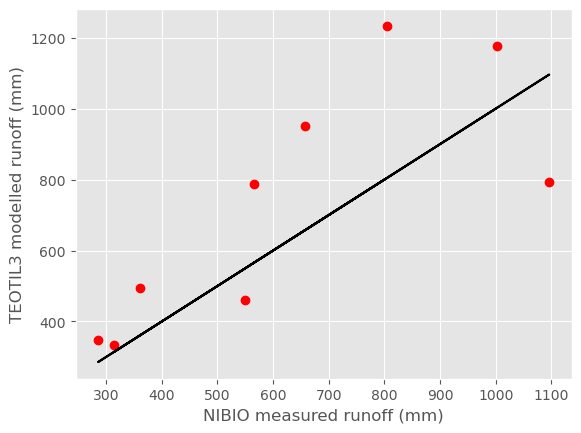

In [16]:
# Plot
plt.plot(nibio_df["nibio_runoff_mm"], nibio_df["runoff_mm/yr"], "ro")
plt.plot(
    nibio_df["nibio_runoff_mm"], nibio_df["nibio_runoff_mm"], "k-", label="1:1 line"
)
plt.xlabel("NIBIO measured runoff (mm)")
plt.ylabel("TEOTIL3 modelled runoff (mm)")

So the TEOTIL estimates based on the NVE data are certainly higher than the NVE estimates.

In [17]:
stn_df.query("station_id == '126.2.0'")[
    [
        "station_id",
        "station_name",
        "drainageBasinArea",
        "regineNo",
        "specificDischarge",
    ]
]

,station_id,station_name,drainageBasinArea,regineNo,specificDischarge
303,126.2.0,Engstad,20.13,126.4Z,17.44


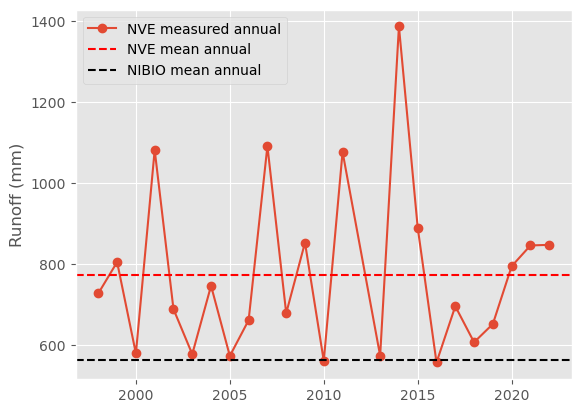

In [18]:
hot_df = nivapy.da.query_nve_hydapi(
    ["126.2.0"], [1001], "1990-01-01", f"{end_yr}-12-31", resolution=1440
)[["datetime", "value"]].set_index("datetime")
hot_df["runoff_mm"] = hot_df["value"] * 60 * 60 * 24 * 1000 / 20.13e6
hot_df = hot_df.resample('A').agg(['sum', 'count'])['runoff_mm'].query("count > 360")[['sum']]
hot_df.index = hot_df.index.year
hot_df.columns = ['NVE measured annual']

# Plot
ax = hot_df.plot(marker='o')
ax.axhline(y=hot_df['NVE measured annual'].mean(), color='r', linestyle='--', label='NVE mean annual')
ax.axhline(y=565, color='k', linestyle='--', label='NIBIO mean annual')
ax.legend(loc='best')
ax.set_ylabel('Runoff (mm)')
ax.set_xlabel('');

#### 3.1.3. Selected other stations

In [ ]:
# Get RID stations
stn_xls = r"/home/jovyan/projects/rid/data/RID_Sites_List_2017-2020.xlsx"
stn_df = pd.read_excel(stn_xls, sheet_name="RID_20")

# Assign to regines
reg_gdf = teo.io.get_regine_geodataframe(eng, end_yr)
stn_df = nivapy.spatial.identify_point_in_polygon(
    stn_df,
    reg_gdf,
    pt_col="station_id",
    poly_col="regine",
    lat_col="lat",
    lon_col="lon",
)
stn_df

In [ ]:
obs_csv = r"/home/jovyan/shared/common/elveovervakingsprogrammet/results/measured_loads/loads_and_flows_rid_20_1990-2022.csv"
obs_df = pd.read_csv(obs_csv)

# Get cols of interest
id_cols = ["station_id", "year"]
q_pars = ["mean_q_1000m3/day"]
chem_pars = ["NO3-N", "NH4-N", "TOTN", "PO4-P", "TOTP", "TOC", "SPM"]
cols = (
    id_cols
    + q_pars
    + [f"{i}_tonnes" for i in chem_pars]
    + [f"{i}_Est" for i in chem_pars]
)
obs_df = obs_df[cols]

# Period of interest
obs_df = obs_df.query("@st_yr <= year <= @end_yr")

# Remove statistical estimates
for par in chem_pars:
    obs_df[f"{par}_tonnes"] = obs_df[f"{par}_tonnes"].where(obs_df[f"{par}_Est"] == 0)
    del obs_df[f"{par}_Est"]
obs_df = obs_df.melt(id_vars=id_cols).dropna()

obs_df.head()

In [ ]:
# Filter to stations with observed data
stn_list = list(obs_df["station_id"].unique())
stn_df = stn_df.query("station_id in @stn_list")

# Get model results
df_list = []
for idx, row in stn_df.iterrows():
    reg_id = row["regine"]
    stn_res_df = df.query("regine == @reg_id").copy()
    stn_res_df["mean_q_1000m3/day"] = stn_res_df["accum_q_m3/s"] * 60 * 60 * 24 / 1000
    stn_res_df["station_id"] = row["station_id"]
    stn_res_df = stn_res_df[["station_id", "year", "mean_q_1000m3/day"]].melt(
        id_vars=id_cols
    )
    df_list.append(stn_res_df)
mod_df = pd.concat(df_list, axis="rows")

comp_df = pd.merge(
    mod_df,
    obs_df,
    how="left",
    on=["station_id", "year", "variable"],
    suffixes=("_mod", "_obs"),
)
comp_df = comp_df.melt(id_vars=["station_id", "year", "variable"], var_name="model")
comp_df["model"] = comp_df["model"].str.replace("value_", "")
comp_df

In [ ]:
sn.relplot(
    comp_df,
    x="year",
    y="value",
    hue="model",
    row="station_id",
    aspect=3,
    kind="line",
    facet_kws={"sharey": False},
)